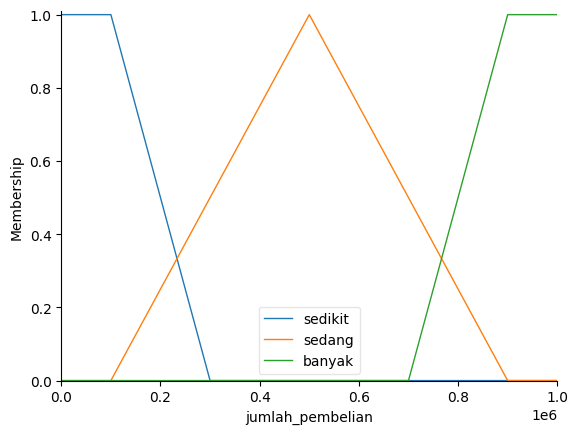

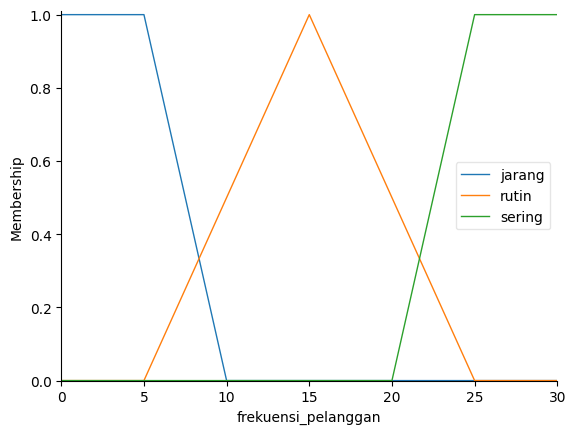

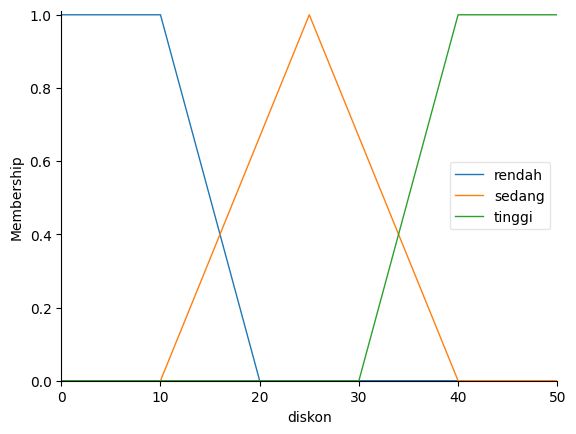

Tingkat diskon yang diberikan: 25.00%


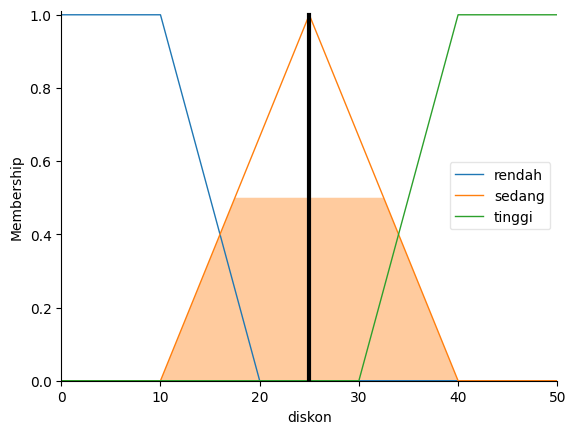

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy.control import Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation
import matplotlib.pyplot as plt

# Aktifkan backend interaktif jika menggunakan Jupyter Notebook
# %matplotlib inline  # Untuk menampilkan grafik langsung di Jupyter Notebook
# %matplotlib notebook

# 1. Definisikan variabel fuzzy
# Input: Jumlah Pembelian (dalam Rupiah)
jumlah_pembelian = Antecedent(np.arange(0, 1000001, 1000), 'jumlah_pembelian')
# Input: Frekuensi Pelanggan (jumlah transaksi dalam 1 bulan)
frekuensi_pelanggan = Antecedent(np.arange(0, 31, 1), 'frekuensi_pelanggan')
# Output: Diskon (dalam persen)
diskon = Consequent(np.arange(0, 51, 1), 'diskon')

# 2. Definisikan himpunan fuzzy
# Jumlah Pembelian
jumlah_pembelian['sedikit'] = fuzz.trapmf(jumlah_pembelian.universe, [0, 0, 100000, 300000])
jumlah_pembelian['sedang'] = fuzz.trimf(jumlah_pembelian.universe, [100000, 500000, 900000])
jumlah_pembelian['banyak'] = fuzz.trapmf(jumlah_pembelian.universe, [700000, 900000, 1000000, 1000000])

# Frekuensi Pelanggan
frekuensi_pelanggan['jarang'] = fuzz.trapmf(frekuensi_pelanggan.universe, [0, 0, 5, 10])
frekuensi_pelanggan['rutin'] = fuzz.trimf(frekuensi_pelanggan.universe, [5, 15, 25])
frekuensi_pelanggan['sering'] = fuzz.trapmf(frekuensi_pelanggan.universe, [20, 25, 30, 30])

# Diskon
diskon['rendah'] = fuzz.trapmf(diskon.universe, [0, 0, 10, 20])
diskon['sedang'] = fuzz.trimf(diskon.universe, [10, 25, 40])
diskon['tinggi'] = fuzz.trapmf(diskon.universe, [30, 40, 50, 50])

# 3. Definisikan aturan fuzzy
rule1 = Rule(jumlah_pembelian['sedikit'] & frekuensi_pelanggan['jarang'], diskon['rendah'])
rule2 = Rule(jumlah_pembelian['sedikit'] & frekuensi_pelanggan['rutin'], diskon['rendah'])
rule3 = Rule(jumlah_pembelian['sedikit'] & frekuensi_pelanggan['sering'], diskon['sedang'])
rule4 = Rule(jumlah_pembelian['sedang'] & frekuensi_pelanggan['jarang'], diskon['rendah'])
rule5 = Rule(jumlah_pembelian['sedang'] & frekuensi_pelanggan['rutin'], diskon['sedang'])
rule6 = Rule(jumlah_pembelian['sedang'] & frekuensi_pelanggan['sering'], diskon['tinggi'])
rule7 = Rule(jumlah_pembelian['banyak'] & frekuensi_pelanggan['jarang'], diskon['sedang'])
rule8 = Rule(jumlah_pembelian['banyak'] & frekuensi_pelanggan['rutin'], diskon['tinggi'])
rule9 = Rule(jumlah_pembelian['banyak'] & frekuensi_pelanggan['sering'], diskon['tinggi'])

# 4. Buat sistem kontrol fuzzy
diskon_ctrl = ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
diskon_simulasi = ControlSystemSimulation(diskon_ctrl)

# 5. Visualisasi himpunan fuzzy
jumlah_pembelian.view()
plt.show()

frekuensi_pelanggan.view()
plt.show()

diskon.view()
plt.show()

# 6. Contoh simulasi sistem
# Masukkan input nilai
diskon_simulasi.input['jumlah_pembelian'] = 600000  # Contoh jumlah pembelian
diskon_simulasi.input['frekuensi_pelanggan'] = 20   # Contoh frekuensi pelanggan

# Jalankan simulasi
diskon_simulasi.compute()

# Cetak hasil output
print(f"Tingkat diskon yang diberikan: {diskon_simulasi.output['diskon']:.2f}%")

# Visualisasi output
diskon.view(sim=diskon_simulasi)
plt.show()
